In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Question: Did the Ford GT cars or drivers exhibit a performance delta from the Roar (Test) to the 24 Race?

Assumption 1: Assume the Roar qualifying session would be the "true" performance of the car/team at the test session since the results of this session were used to select pit stalls for the 24 Hr race.

Assumption 2: Assume the team ran flat out during the 24hr race due to the prestige of winning this event. IE: No reason to sandbag at this event.

In [27]:
# Setup paths to the pertinent data files

# Roar Before the 24 Qualifying Data
strRoarQ = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC ROAR Qualifying.csv'

# 24 Hrs of Daytona Qualifying and Race Data
strQ =     'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC Daytona Qualifying.csv'
strR =     'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC Daytona Race.csv'

# Read the data
dfRQ = pd.read_csv(strRoarQ)

dfQ = pd.read_csv(strQ)
dfR = pd.read_csv(strR)

In [28]:
#Function to fix the time (string)
def fixTime(df):
    '''This function takes the dataframe as an argument and 
    converts the string Lap Time column to be a datetime
    and then converts the datetime column to be a float.
    The function then returns the dataframe with those two
    columns appended to the right'''
    
    # TODO: Check to make sure that the 'Lap Time' column
    #       exists.
    # TODO: Check to make sure that the 'Lap Time' column
    #       is the right format
    
    df = df.assign(dtLapTime = pd.to_datetime('0:0:' + df['Lap Time'] + '0',
                                             exact = False, errors = 'ignore',
                                             format = "%H:%M:%S.%f").apply(lambda x: x.time()))
    df = df.assign(fLapTime = df.dtLapTime.apply(lambda x: ((x.hour * 60 + x.minute) * 60 + x.second) * 1000000 + x.microsecond) / 1000000)
    return df

In [29]:
dfRQ = fixTime(dfRQ)
dfQ  = fixTime(dfQ)
dfR  = fixTime(dfR)

In [30]:
def getCarData(df, car_num, max_time):
    # make sure car exists
    # make a default max time val
    return df[(df['Car'] == car_num) & (df['Flag'] == 'Green') & (df['fLapTime'] < max_time)]

In [31]:
narrow_columns = ['Car','Class', 'Lap', 'Flag', 'Lap Time','fLapTime']

dfRQ_Narrow= dfRQ[narrow_columns]
dfQ_Narrow = dfQ[narrow_columns]
dfR_Narrow = dfR[narrow_columns]

# dfRQ_Narrow : Roar Qually
dfRQ66 = getCarData(dfRQ_Narrow, 66, 500)
dfRQ67 = getCarData(dfRQ_Narrow, 67, 500)
dfRQ68 = getCarData(dfRQ_Narrow, 68, 500)
dfRQ69 = getCarData(dfRQ_Narrow, 69, 500)

# dfQ_Narrow : Race Qually
dfQ_66 = getCarData(dfQ_Narrow, 66, 500)
dfQ_67 = getCarData(dfQ_Narrow, 67, 500)
dfQ_68 = getCarData(dfQ_Narrow, 68, 500)
dfQ_69 = getCarData(dfQ_Narrow, 69, 500)

# dfR_Narrow : Race
dfR_66 = getCarData(dfR_Narrow, 66, 500)
dfR_67 = getCarData(dfR_Narrow, 67, 500)
dfR_68 = getCarData(dfR_Narrow, 68, 500)
dfR_69 = getCarData(dfR_Narrow, 69, 500)

In [32]:
dfQ_66

,Car,Class,Lap,Flag,Lap Time,fLapTime
177,66,GTLM,2,Green,1:48.838,108.838
185,66,GTLM,3,Green,1:43.986,103.986
194,66,GTLM,4,Green,1:42.986,102.986
203,66,GTLM,5,Green,1:42.798,102.798
211,66,GTLM,6,Green,1:43.184,103.184


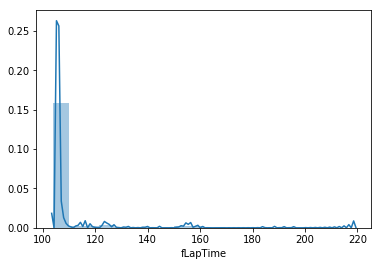

In [33]:
sns.distplot(dfR_66.fLapTime, bins = 20)

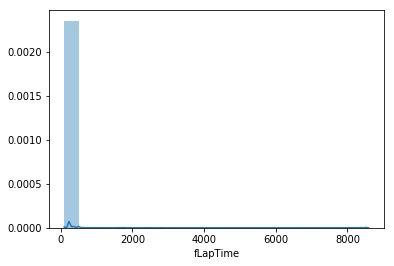

In [34]:
sns.distplot(dfR['fLapTime'], bins = 20)
